In [ ]:
Дисклеймер.

будет код.

Итоговая сводка по анализу данных задачи №27.

1. Обзор.

В игру играло 365 человек в течении одного года. Общая прибыль составила 16964.
Средний чек на одного игрока 46.476. Самый успешный квартал: четвёртый и третий.
Но третий квартал проигрывает четвёртому по среднему чеку: 45.145 против 40.911.
    
2. Ивенты.

С точки зрения экономики самым успешным был третий эвент - прибыль в 5750.
Но, с ним сопоставимый по успеху - второй, прибыль в 4756, однако по чекам:
    
    63.4 в третьемм эвенте против 58.08 во втором.
    
С учётом того, что 3ый эвент закрыло 99 юзеров, а третий только 75 я делаю вывод:
Оба ивента были одинаково успешны: разница в прибыли обусловенна внешними факторами.
    
3. Прибыль.

Среднегодовая прибыль находиться на отметке в 43.8
Наибольшая прибыль находиться на отметке в 64.
Наименьшая прибыль на отметке в 24. 

Так что я считаю что успешным был только четвертый квартал, так как:
- средний чек этого квартала выше чем среднегодовая прибыль игры.

4. По прибыли.

Лидирует максимально возможный тип прибыли: 60 у.е проплатили 118 раз.
Следом за ней идёт прибыль "чуть выше минимума" - 30. у.е проплатили 83 раза.
Поскольку максимльная окупаемость превалирует я делаю вывод что всё ОК, как говорил Живец.

5. Фокус группа.

В данных выявленная фокус группа лояльных игроков в 20 человек, которые:
20 человек играло 2 квартала подряд, а двое играли 3 квартала.
acvgh0132655 и acvgh0131130 заслужили приз от игры

Срений чек фокус группы: 47.090
Общая прибыль группы: 1036
    
Таким образом фокус группа сгенерировала 1\5(6) общей прибыли игры.

6. Прогноз роста.

Фокус группа росла по 5 человек в квартал, начиная со второго, вывод:
Успех или неуспех 5ого квартала определяет прирост фокус группы в 5+

7. Рекомендации.

Наградить внутриигровыми плюшками игроков из фокус-группы в целях рекламы.
Поощрение лояльных игроков при грамотной подаче в коммуньюнити даст эффект.

        Их имена.
    
        acvgh0132655    
        acvgh0131130    
        acvgh0131001    
        acvgh0130311    
        acvgh0131738    
        acvgh0132057    
        acvgh0132823    
        acvgh0131748    
        acvgh0131196    
        acvgh0130562    
        acvgh0131296    
        acvgh0132217    
        acvgh0130757    
        acvgh0132813    
        acvgh0131016    
        acvgh0130707    
        acvgh0132026    
        acvgh0131246    
        acvgh0131436    
        acvgh0130734    
        acvgh0131656    
        acvgh0132429

8. Итого.

4ый квартал проекта был наиболее успешным.

Юзер-ориентированная модель последующие оценки проекта:
- дианмика роста лояльных игркоов в 4ом квартале.
- средний чек 4ого квартала

Коммерчески-ориентированная модель оценки проекта:    
- сравнение прибыли с 3им кварталом: очень хороший поазатель.
- сравнение прибыли с 4ым кварталом: хороший показатель.
- всё что ниже: плохо.
    
9. Остальное.



11. pony_in_action() не воровать, это я придумал оборачивать датафреймы в yield.



In [1]:
import pandas as pd
import numpy as np
%pylab inline                 
from pylab import rcParams    
rcParams['figure.figsize'] = 25, 18
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

Populating the interactive namespace from numpy and matplotlib


In [131]:
df_sheet = pd.read_csv('C:/Users/Battlestation/Downloads/Test.xlsx - Sheet1.csv', sep=',')
df_sheet.head()

,id,events,quarter,revenue
0,acvgh0132309,event1,Q1,40
1,acvgh0131805,event3,Q1,50
2,acvgh0130646,event1,Q1,40
3,acvgh0132677,event3,Q1,50
4,acvgh0131130,event4,Q1,38


In [132]:
df_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 4 columns):
id         387 non-null object
events     387 non-null object
quarter    387 non-null object
revenue    387 non-null int64
dtypes: int64(1), object(3)
memory usage: 12.2+ KB


In [4]:
for c in df_sheet.columns:
    n = df_sheet[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df_sheet[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
365
----------
events
4
----------
quarter
4
----------
revenue
8
----------


In [5]:
# хорошо видно что лидирует либо максимальная либо почти минимальная окупаемость.
df_sheet['revenue'].value_counts()

60    118
30     83
24     38
40     35
64     34
26     33
50     25
38     21
Name: revenue, dtype: int64

In [6]:
# Вся прибыль
df_sheet['revenue'].sum()

16964

In [ ]:
В выборке существует 365 уникальный ID записей и 4 типа эвентов, которые прошли в течении года поквартально.

In [10]:
# 365 - это число уникальный ID, 22 - число повторяющихся.
df_sheet['id'].duplicated().value_counts()

False    365
True      22
Name: id, dtype: int64

In [ ]:
22 игрока приняли участие более одного раза - будем считать этих игроков лояльной к игре фокус группой.

In [12]:
# Проверяем что именно 22.
unic_user_list = df_sheet['id'].value_counts()
unic_user_list[:22]

acvgh0131130    3
acvgh0132655    3
acvgh0132823    2
acvgh0132217    2
acvgh0130311    2
acvgh0131001    2
acvgh0132026    2
acvgh0131436    2
acvgh0131748    2
acvgh0131246    2
acvgh0130757    2
acvgh0131016    2
acvgh0130562    2
acvgh0131738    2
acvgh0132813    2
acvgh0132057    2
acvgh0130707    2
acvgh0131196    2
acvgh0131296    2
acvgh0130734    2
acvgh0130539    1
acvgh0131746    1
Name: id, dtype: int64

In [ ]:
При этом 3 игрока приняли участие в происходившем 3 раза, что даёт нам 20 человек с участием в течении полугода.

Посмотрим на них.

In [13]:
df_sheet[df_sheet['id'] =='acvgh0132655']

,id,events,quarter,revenue
125,acvgh0132655,event1,Q2,40
244,acvgh0132655,event3,Q3,60
315,acvgh0132655,event3,Q4,60


In [14]:
df_sheet[df_sheet['id'] =='acvgh0131130']

,id,events,quarter,revenue
4,acvgh0131130,event4,Q1,38
234,acvgh0131130,event1,Q3,24
326,acvgh0131130,event4,Q4,30


In [ ]:
Поскольку они участовали в разных эвентах и принесли разную прибыль - исключать их из фокус группы нельзя.

Для дальнейшего анализа потребуеться провести переразметку данных.

In [133]:
# Вынесем все уникальные ID записи в отдельный признак для чистоты построения обзорных графиков.
df_sheet['unic_user'] = df_sheet['id'].drop_duplicates()
df_sheet.tail(10)

,id,events,quarter,revenue,unic_user
377,acvgh0130497,event3,Q4,60,acvgh0130497
378,acvgh0132113,event3,Q4,60,acvgh0132113
379,acvgh0132191,event3,Q4,60,acvgh0132191
380,acvgh0131436,event2,Q4,60,NaN
381,acvgh0132844,event2,Q4,60,acvgh0132844
382,acvgh0130229,event2,Q4,60,acvgh0130229
383,acvgh0130470,event1,Q4,30,acvgh0130470
384,acvgh0132211,event2,Q4,60,acvgh0132211
385,acvgh0130972,event1,Q4,30,acvgh0130972
386,acvgh0132635,event2,Q4,60,acvgh0132635


In [134]:
# И сразу проведём преобразование данных для дальнейшей работы с ними.

df_sheet['focus_group'] = ((df_sheet['id'] != df_sheet['unic_user']))
df_sheet['Q1'] = df_sheet['quarter'] == 'Q1'
df_sheet['Q2'] = df_sheet['quarter'] == 'Q2'
df_sheet['Q3'] = df_sheet['quarter'] == 'Q3'
df_sheet['Q4'] = df_sheet['quarter'] == 'Q4'

In [17]:
df_sheet.head(10)

,id,events,quarter,revenue,unic_user,focus_group,Q1,Q2,Q3,Q4
0,acvgh0132309,event1,Q1,40,acvgh0132309,False,True,False,False,False
1,acvgh0131805,event3,Q1,50,acvgh0131805,False,True,False,False,False
2,acvgh0130646,event1,Q1,40,acvgh0130646,False,True,False,False,False
3,acvgh0132677,event3,Q1,50,acvgh0132677,False,True,False,False,False
4,acvgh0131130,event4,Q1,38,acvgh0131130,False,True,False,False,False
5,acvgh0131857,event1,Q1,40,acvgh0131857,False,True,False,False,False
6,acvgh0131836,event2,Q1,64,acvgh0131836,False,True,False,False,False
7,acvgh0131338,event4,Q1,38,acvgh0131338,False,True,False,False,False
8,acvgh0132874,event3,Q1,50,acvgh0132874,False,True,False,False,False
9,acvgh0132569,event3,Q1,50,acvgh0132569,False,True,False,False,False


In [ ]:
Начнём с построения обзорных графиков.

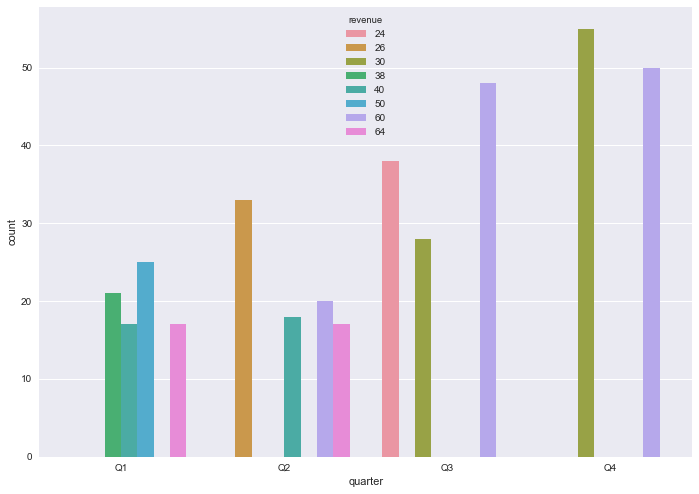

In [23]:
# Прибыль по кварталам.
sns.countplot(x='quarter', hue='revenue', data=df_sheet);

In [19]:
def select():
    Q1 = df_sheet[df_sheet['quarter'] =='Q1']
    Q2 = df_sheet[df_sheet['quarter'] =='Q2']
    Q3 = df_sheet[df_sheet['quarter'] =='Q3']
    Q4 = df_sheet[df_sheet['quarter'] =='Q4']
    return Q1,Q2,Q3,Q4

def warp_field_generator():
    for pony in select():
        yield pony

warp_portal = warp_field_generator()  

def pony_in_action():
    for warp in warp_portal:
        profit = warp['revenue'].sum()
        unic_users = warp['id'].drop_duplicates().value_counts().sum()
        user_profit = profit / unic_users
        print ('Прибыль по кварталам', profit,'Число уникальных юзеров', unic_users, 'Средний чек', user_profit ) 

In [20]:
pony_in_action()

Прибыль по кварталам 3816 Число уникальных юзеров 80 Средний чек 47.7
Прибыль по кварталам 3866 Число уникальных юзеров 88 Средний чек 43.93181818181818
Прибыль по кварталам 4632 Число уникальных юзеров 113 Средний чек 40.991150442477874
Прибыль по кварталам 4650 Число уникальных юзеров 103 Средний чек 45.14563106796116


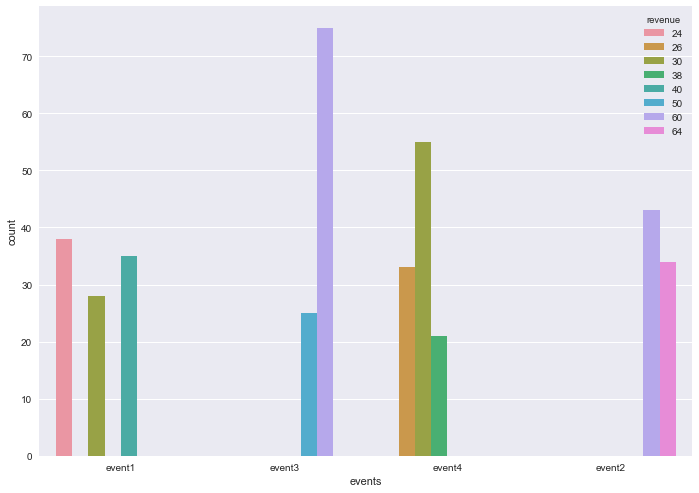

In [24]:
# Прибыль по эвентам - эвент номер три самый успешный.
sns.countplot(x='events', hue='revenue', data=df_sheet);

In [21]:
# И по эвентам

def select():
    Q1 = df_sheet[df_sheet['events'] =='event1']
    Q2 = df_sheet[df_sheet['events'] =='event2']
    Q3 = df_sheet[df_sheet['events'] =='event3']
    Q4 = df_sheet[df_sheet['events'] =='event4']
    return Q1,Q2,Q3,Q4

def warp_field_generator():
    for pony in select():
        yield pony

warp_portal = warp_field_generator()  

def pony_in_action():
    for warp in warp_portal:
        profit = warp['revenue'].sum()
        unic_users = warp['id'].drop_duplicates().value_counts().sum()
        user_profit = profit / unic_users
        print ('Прибыль по эвентам', profit,'Число уникальных юзеров', unic_users, 'Средний чек', user_profit )

In [22]:
pony_in_action()

Прибыль по эвентам 3152 Число уникальных юзеров 99 Средний чек 31.838383838383837
Прибыль по эвентам 4756 Число уникальных юзеров 75 Средний чек 63.413333333333334
Прибыль по эвентам 5750 Число уникальных юзеров 99 Средний чек 58.08080808080808
Прибыль по эвентам 3306 Число уникальных юзеров 108 Средний чек 30.61111111111111


In [ ]:
А теперь посмотрим немного внутрь и построим ещё несколько интересных графиков.

Но для этого нужно подготовить данные.

In [25]:
df_vector = df_sheet.copy()

In [26]:
df_vector['events'] = pd.factorize(df_vector['events'])[0]
df_vector['quarter'] = pd.factorize(df_vector['quarter'])[0]
df_vector.head()

,id,events,quarter,revenue,unic_user,focus_group,Q1,Q2,Q3,Q4
0,acvgh0132309,0,0,40,acvgh0132309,False,True,False,False,False
1,acvgh0131805,1,0,50,acvgh0131805,False,True,False,False,False
2,acvgh0130646,0,0,40,acvgh0130646,False,True,False,False,False
3,acvgh0132677,1,0,50,acvgh0132677,False,True,False,False,False
4,acvgh0131130,2,0,38,acvgh0131130,False,True,False,False,False


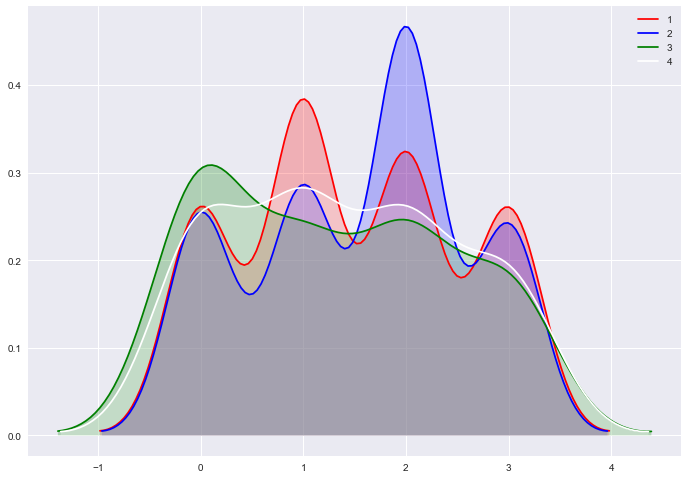

In [27]:
# Общая картина мира - активность юзеров по кварталм в заивисомости от типа события.

# Во втором квартале юзеры были наиболее активны. 
# Первый квартал был наиболее стабильным периодом.
# Четвёртый квартал можно рассматривать как медиану.

sns.kdeplot(df_vector['events'][df_vector.quarter==0], shade=True, color="r", label='1')
sns.kdeplot(df_vector['events'][df_vector.quarter==1], shade=True, color="b", label='2')
sns.kdeplot(df_vector['events'][df_vector.quarter==2], shade=True, color="g", label='3')
sns.kdeplot(df_vector['events'][df_vector.quarter==3], shade=True, color="w", label='4')

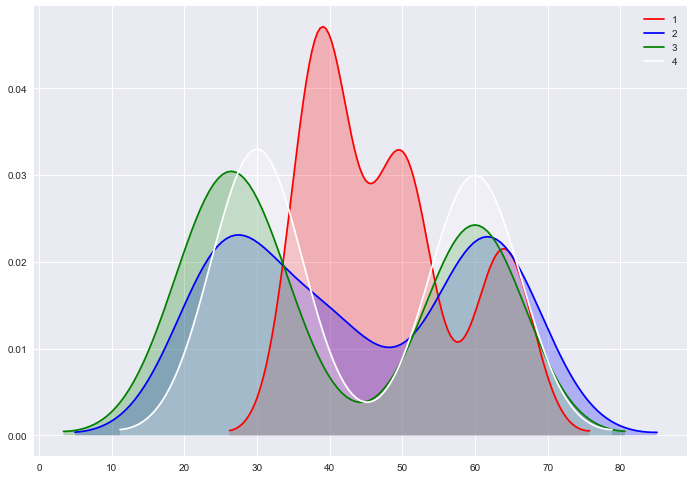

In [28]:
# Общая картина мира - прибыль по кварталам.
# Первый квартал - наиболее пиковое значение.
# Третий квартал был наименее финансово успешным.

sns.kdeplot(df_vector['revenue'][df_vector.quarter==0], shade=True, color="r", label='1')
sns.kdeplot(df_vector['revenue'][df_vector.quarter==1], shade=True, color="b", label='2')
sns.kdeplot(df_vector['revenue'][df_vector.quarter==2], shade=True, color="g", label='3')
sns.kdeplot(df_vector['revenue'][df_vector.quarter==3], shade=True, color="w", label='4')

In [29]:
# Среднегодовая прибыль находиться на отметке в 43.8
# Наибольшая прибыль находиться на отметке в 64.
# Наименьшая прибыль на отметке в 24.

df_sheet.describe()

,revenue
count,387.000000
mean,43.834625
std,15.113853
min,24.000000
25%,30.000000
50%,40.000000
75%,60.000000
max,64.000000


In [ ]:
Третья часть тестового задания.

In [73]:
df_sql_contactname = pd.read_csv('C:/Users/Battlestation/Downloads/TestSQL.xlsx - contactname.csv', sep=',')
df_sql_contactname.head()

,nameid,firstname,lastname,phone
0,1,Shelley,Burke,(100) 555-4822
1,2,Dirk,Luchte,(12345) 1212
2,3,Charlotte,Cooper,(171) 555-2222
3,4,Marie,Delamare,85.57.00.07
4,5,Carlos,Diaz,(11) 555 4640


In [74]:
df_sql_contactname.rename(columns={'nameid': 'contact_name_id'}, inplace=True)
df_sql_contactname.rename(columns={'firstname': 'first_name'}, inplace=True)
df_sql_contactname.rename(columns={'lastname': 'last_name'}, inplace=True)
df_sql_contactname.head()

,contact_name_id,first_name,last_name,phone
0,1,Shelley,Burke,(100) 555-4822
1,2,Dirk,Luchte,(12345) 1212
2,3,Charlotte,Cooper,(171) 555-2222
3,4,Marie,Delamare,85.57.00.07
4,5,Carlos,Diaz,(11) 555 4640


In [75]:
df_sql_supplier = pd.read_csv('C:/Users/Battlestation/Downloads/TestSQL.xlsx - supplier.csv', sep=',')
df_sql_supplier.head()

,supplierID,supplierName,nameid
0,1,Exotic Liquid,2
1,2,New Orleans Cajun Delights,22
2,3,Grandma Kelly's Homestead,1
3,4,Tokyo Traders,27
4,5,Cooperativa de Quesos 'Las Cabras',10


In [76]:
df_sql_supplier.rename(columns={'nameid': 'supplier_name_id'}, inplace=True)
df_sql_supplier.rename(columns={'supplierID': 'supplier_id'}, inplace=True)
df_sql_supplier.rename(columns={'supplierName': 'supplier_name'}, inplace=True)
df_sql_supplier.head()

,supplier_id,supplier_name,supplier_name_id
0,1,Exotic Liquid,2
1,2,New Orleans Cajun Delights,22
2,3,Grandma Kelly's Homestead,1
3,4,Tokyo Traders,27
4,5,Cooperativa de Quesos 'Las Cabras',10


In [77]:
df_sql_address = pd.read_csv('C:/Users/Battlestation/Downloads/TestSQL.xlsx - address.csv', sep=',')
df_sql_address.head()

,id,address,city,postalcode,country,supplierID
0,1,74 Rose St. Moonie Ponds,Melbourne,3058,Australia,7
1,2,49 Gilbert St.,Londona,EC1 4SD,UK,1
2,3,"22, rue H. Voiron",Montceau,71300,France,27
3,4,Calle del Rosal 4,Oviedo,33007,Spain,5
4,5,3400 - 8th Avenue Suite 210,Bend,97101,USA,16


In [78]:
df_sql_address.rename(columns={'supplierID': 'address_supplier_id'}, inplace=True)
df_sql_address.rename(columns={'id': 'address_id'}, inplace=True)
df_sql_address.head()

,address_id,address,city,postalcode,country,address_supplier_id
0,1,74 Rose St. Moonie Ponds,Melbourne,3058,Australia,7
1,2,49 Gilbert St.,Londona,EC1 4SD,UK,1
2,3,"22, rue H. Voiron",Montceau,71300,France,27
3,4,Calle del Rosal 4,Oviedo,33007,Spain,5
4,5,3400 - 8th Avenue Suite 210,Bend,97101,USA,16


In [79]:
df_sql_revenue = pd.read_csv('C:/Users/Battlestation/Downloads/TestSQL.xlsx - revenue.csv', sep=',')
df_sql_revenue.head()

,id,revenue,supplierID
0,1,11000,13
1,2,7000,15
2,3,8000,29
3,4,4000,2
4,5,12000,10


In [80]:
df_sql_revenue.rename(columns={'supplierID': 'revenue_supplier_id'}, inplace=True)
df_sql_revenue.rename(columns={'id': 'revenue_id'}, inplace=True)
df_sql_revenue.head()

,revenue_id,revenue,revenue_supplier_id
0,1,11000,13
1,2,7000,15
2,3,8000,29
3,4,4000,2
4,5,12000,10


In [117]:
df_sql_bd = pd.concat([df_sql_contactname,df_sql_supplier,df_sql_address,df_sql_revenue], axis =1)

In [118]:
df_sql_bd.head()

,contact_name_id,first_name,last_name,phone,supplier_id,supplier_name,supplier_name_id,address_id,address,city,postalcode,country,address_supplier_id,revenue_id,revenue,revenue_supplier_id
0,1,Shelley,Burke,(100) 555-4822,1,Exotic Liquid,2,1,74 Rose St. Moonie Ponds,Melbourne,3058,Australia,7,1,11000,13
1,2,Dirk,Luchte,(12345) 1212,2,New Orleans Cajun Delights,22,2,49 Gilbert St.,Londona,EC1 4SD,UK,1,2,7000,15
2,3,Charlotte,Cooper,(171) 555-2222,3,Grandma Kelly's Homestead,1,3,"22, rue H. Voiron",Montceau,71300,France,27,3,8000,29
3,4,Marie,Delamare,85.57.00.07,4,Tokyo Traders,27,4,Calle del Rosal 4,Oviedo,33007,Spain,5,4,4000,2
4,5,Carlos,Diaz,(11) 555 4640,5,Cooperativa de Quesos 'Las Cabras',10,5,3400 - 8th Avenue Suite 210,Bend,97101,USA,16,5,12000,10


In [ ]:
Вот эту витрину данных уже можно заливать на сервер и можно с ней работать.

Потому что генераторы ещё никто не отменял.

In [83]:
df_sql_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 16 columns):
contact_name_id        29 non-null int64
first_name             29 non-null object
last_name              29 non-null object
phone                  29 non-null object
supplier_id            29 non-null int64
supplier_name          29 non-null object
supplier_name_id       29 non-null int64
address_id             29 non-null int64
address                29 non-null object
city                   29 non-null object
postalcode             29 non-null object
country                29 non-null object
address_supplier_id    29 non-null int64
revenue_id             29 non-null int64
revenue                29 non-null int64
revenue_supplier_id    29 non-null int64
dtypes: int64(8), object(8)
memory usage: 3.7+ KB


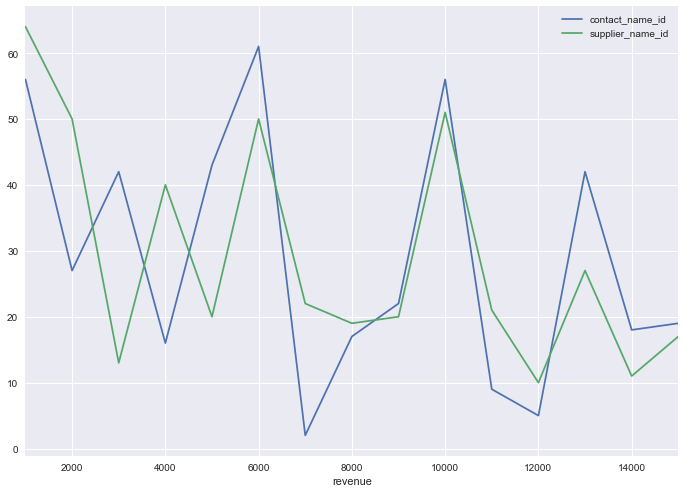

In [84]:
sql_data = df_sql_bd[[x for x in df_sql_bd.columns if 'name' in x] + ['revenue']]
sql_data.groupby('revenue').sum().plot()

In [136]:
df_task_17 = df_sql_bd.groupby(['supplier_name','first_name', 'last_name', 'address', 'city','postalcode','country','phone'])

In [141]:
df_task_17 = pd.DataFrame(df_test_task_1.size().reset_index(name = "Group_Count")) 
df_task_17.head()

,supplier_name,first_name,last_name,address,city,postalcode,country,phone,Group_Count
0,Aux joyeux ecclйsiastiques,Petra,Winkler,Valtakatu 12,Lappeenranta,53120,Finland,(010) 9984510,1
1,Bigfoot Breweries,Antonio del Valle,Saavedra,148 rue Chasseur,Ste-Hyacinthe,J2S 7S8,Canada,(98) 598 76 54,1
2,Cooperativa de Quesos 'Las Cabras',Carlos,Diaz,3400 - 8th Avenue Suite 210,Bend,97101,USA,(11) 555 4640,1
3,Escargots Nouveaux,Lars,Peterson,29 King's Way,Manchester,M14 GSD,UK,031-987 65 43,1
4,Exotic Liquid,Shelley,Burke,74 Rose St. Moonie Ponds,Melbourne,3058,Australia,(100) 555-4822,1


In [108]:
df_task_17.to_csvdf_task_17.csv')

In [65]:
# Проверяем сохранность созданного мной файл и подбираем подходящую кодировку.
df_anime = pd.read_csv('C:/Users/Battlestation/Untitled Folder/df_task_17.csv', sep=',' , encoding= 'windows-1251')
df_anime.head()

,Unnamed: 0,supplier_name,first_name,last_name,address,city,postalcode,country,phone,Group_Count
0,0,Aux joyeux ecclйsiastiques,Petra,Winkler,Valtakatu 12,Lappeenranta,53120,Finland,(010) 9984510,1
1,1,Bigfoot Breweries,Antonio del Valle,Saavedra,148 rue Chasseur,Ste-Hyacinthe,J2S 7S8,Canada,(98) 598 76 54,1
2,2,Cooperativa de Quesos 'Las Cabras',Carlos,Diaz,3400 - 8th Avenue Suite 210,Bend,97101,USA,(11) 555 4640,1
3,3,Escargots Nouveaux,Lars,Peterson,29 King's Way,Manchester,M14 GSD,UK,031-987 65 43,1
4,4,Exotic Liquid,Shelley,Burke,74 Rose St. Moonie Ponds,Melbourne,3058,Australia,(100) 555-4822,1


In [66]:
# Хм. а откуда тут взъялись лишние колонки? видимо я гдето напетлял. но время позднее. переживёте.
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
Unnamed: 0       29 non-null int64
supplier_name    29 non-null object
first_name       29 non-null object
last_name        29 non-null object
address          29 non-null object
city             29 non-null object
postalcode       29 non-null object
country          29 non-null object
phone            29 non-null object
Group_Count      29 non-null int64
dtypes: int64(2), object(8)
memory usage: 2.3+ KB


In [67]:
# Почистим лишнее и продолжим создавать заявленную в ТЗ витрину данных
df_pony = df_anime.drop(['Unnamed: 0', 'address','postalcode','Group_Count'], axis=1)
df_pony.head()

,supplier_name,first_name,last_name,city,country,phone
0,Aux joyeux ecclйsiastiques,Petra,Winkler,Lappeenranta,Finland,(010) 9984510
1,Bigfoot Breweries,Antonio del Valle,Saavedra,Ste-Hyacinthe,Canada,(98) 598 76 54
2,Cooperativa de Quesos 'Las Cabras',Carlos,Diaz,Bend,USA,(11) 555 4640
3,Escargots Nouveaux,Lars,Peterson,Manchester,UK,031-987 65 43
4,Exotic Liquid,Shelley,Burke,Melbourne,Australia,(100) 555-4822


In [68]:
# Посмотрим на распредление поставщиков по странам.
df_pony['country'].value_counts()

USA             4
France          3
Germany         3
Canada          2
Italy           2
UK              2
Japan           2
Australia       2
Singapore       1
Spain           1
Denmark         1
Sweden          1
Sweden          1
Brazil          1
Netherlands     1
Finland         1
Norway          1
Name: country, dtype: int64

In [108]:
# Создадим на основе этих данных отдельную выборку.
Country_Supplier_Number = df_pony['country'].value_counts().reset_index(name='Country_Supplier_Number')
Country_Supplier_Number

,index,Country_Supplier_Number
0,USA,4
1,France,3
2,Germany,3
3,Canada,2
4,Italy,2
5,UK,2
6,Japan,2
7,Australia,2
8,Singapore,1
9,Spain,1


In [122]:
# Сформируем окончательную витрину данных для вашего сервера.
df_final = df_pony.merge(Country_Supplier_Number, left_on='country', right_on='index', how='outer')

In [123]:
df_final

,supplier_name,first_name,last_name,city,country,phone,index,Country_Supplier_Number
0,Aux joyeux ecclйsiastiques,Petra,Winkler,Lappeenranta,Finland,(010) 9984510,Finland,1
1,Bigfoot Breweries,Antonio del Valle,Saavedra,Ste-Hyacinthe,Canada,(98) 598 76 54,Canada,2
2,Nord-Ost-Fisch Handelsgesellschaft mbH,Elio,Rossi,Montrйal,Canada,(0544) 60323,Canada,2
3,Cooperativa de Quesos 'Las Cabras',Carlos,Diaz,Bend,USA,(11) 555 4640,USA,4
4,"G'day, Mate",Anne,Heikkonen,New Orleans,USA,(953) 10956,USA,4
5,Heli SьЯwaren GmbH & Co. KG,Jean-Guy,Lauzon,Boston,USA,(514) 555-9022,USA,4
6,Lyngbysild,Regina,Murphy,Ann Arbor,USA,(313) 555-5735,USA,4
7,Escargots Nouveaux,Lars,Peterson,Manchester,UK,031-987 65 43,UK,2
8,New Orleans Cajun Delights,Dirk,Luchte,Londona,UK,(12345) 1212,UK,2
9,Exotic Liquid,Shelley,Burke,Melbourne,Australia,(100) 555-4822,Australia,2


In [124]:
# Так лучше.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 8 columns):
supplier_name              29 non-null object
first_name                 29 non-null object
last_name                  29 non-null object
city                       29 non-null object
country                    29 non-null object
phone                      29 non-null object
index                      29 non-null object
Country_Supplier_Number    29 non-null int64
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [125]:
df_final.to_csv('sql_task_final.csv',index=False)

In [126]:
# угу. видать я в прошлый раз index=False забыл написать.
# вот эту витрину вполне можно положить на SQL-сервер.
df_anime = pd.read_csv('C:/Users/Battlestation/Untitled Folder/sql_task_final.csv', sep=',' , encoding= 'windows-1251')
df_anime.head()

,supplier_name,first_name,last_name,city,country,phone,index,Country_Supplier_Number
0,Aux joyeux ecclйsiastiques,Petra,Winkler,Lappeenranta,Finland,(010) 9984510,Finland,1
1,Bigfoot Breweries,Antonio del Valle,Saavedra,Ste-Hyacinthe,Canada,(98) 598 76 54,Canada,2
2,Nord-Ost-Fisch Handelsgesellschaft mbH,Elio,Rossi,Montrйal,Canada,(0544) 60323,Canada,2
3,Cooperativa de Quesos 'Las Cabras',Carlos,Diaz,Bend,USA,(11) 555 4640,USA,4
4,"G'day, Mate",Anne,Heikkonen,New Orleans,USA,(953) 10956,USA,4


In [ ]:
# В этом случае обработка данных в отношении числа поставщиков будет проходить по двум колонкам.

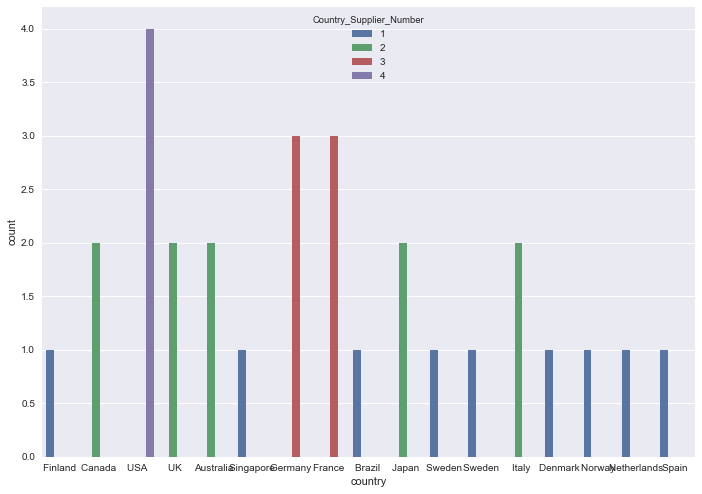

In [130]:
# Посмотрим на распределние поставщиков по странам на графике.
sns.countplot(x='country', hue='Country_Supplier_Number', data=df_anime);

In [ ]:
Америка лидирует - кто бы сомневался, а теперь вернёмся к первой задаче. Кажеться там была фокус группа.

In [135]:
df_sheet.head()

,id,events,quarter,revenue,unic_user,focus_group,Q1,Q2,Q3,Q4
0,acvgh0132309,event1,Q1,40,acvgh0132309,False,True,False,False,False
1,acvgh0131805,event3,Q1,50,acvgh0131805,False,True,False,False,False
2,acvgh0130646,event1,Q1,40,acvgh0130646,False,True,False,False,False
3,acvgh0132677,event3,Q1,50,acvgh0132677,False,True,False,False,False
4,acvgh0131130,event4,Q1,38,acvgh0131130,False,True,False,False,False


In [144]:
df_sheet.focus_group = df_sheet.focus_group.astype('int')

In [146]:
df_focus = df_sheet[df_sheet.focus_group == 1]

In [147]:
df_focus

,id,events,quarter,revenue,unic_user,focus_group,Q1,Q2,Q3,Q4
132,acvgh0132813,event3,Q2,60,NaN,1,False,True,False,False
163,acvgh0131001,event2,Q2,64,NaN,1,False,True,False,False
169,acvgh0132217,event3,Q3,60,NaN,1,False,False,True,False
201,acvgh0130734,event1,Q3,24,NaN,1,False,False,True,False
222,acvgh0130562,event1,Q3,24,NaN,1,False,False,True,False
234,acvgh0131130,event1,Q3,24,NaN,1,False,False,True,False
244,acvgh0132655,event3,Q3,60,NaN,1,False,False,True,False
261,acvgh0132823,event2,Q3,60,NaN,1,False,False,True,False
278,acvgh0131246,event2,Q3,60,NaN,1,False,False,True,False
284,acvgh0131748,event4,Q4,30,NaN,1,False,False,False,True


In [148]:
# Средний чек по фокус группе.
df_focus['revenue'].sum() /22

47.09090909090909

In [160]:
# Прибыль по фокус группе.
df_focus['revenue'].sum()

1036

In [166]:
def select():
    Q1 = df_focus[df_focus['quarter'] =='Q1']
    Q2 = df_focus[df_focus['quarter'] =='Q2']
    Q3 = df_focus[df_focus['quarter'] =='Q3']
    Q4 = df_focus[df_focus['quarter'] =='Q4']
    return Q1,Q2,Q3,Q4

def warp_field_generator():
    for pony in select():
        yield pony

warp_portal = warp_field_generator()  

def pony_in_action():
    for warp in warp_portal:
        profit = warp['revenue'].sum()
        unic_users = warp['id'].value_counts().sum()
        try:
            user_profit = profit / unic_users
        except ZeroDivisionError:
            user_profit = 0
            
        print ('Прибыль по кварталам', profit,'Число уникальных юзеров', unic_users, 'Средний чек', user_profit ) 

In [167]:
pony_in_action()

Прибыль по кварталам 0 Число уникальных юзеров 0 Средний чек 0
Прибыль по кварталам 124 Число уникальных юзеров 2 Средний чек 62.0
Прибыль по кварталам 312 Число уникальных юзеров 7 Средний чек 44.57142857142857
Прибыль по кварталам 600 Число уникальных юзеров 13 Средний чек 46.15384615384615


In [ ]:
Как видно по фокус группе 4ый квартал оказася наиболее успешным.
Имеет местоя ярковыраженная тенденция к росту фокус группы: +5 за сезон.
    Так что уже можно спрогнозировать уровень успеха\неуспеха на 5 сезон.
    А теперь отправим как всю собранную информацию в сводку на первом экране.